In [1]:
# Install yfinance to fetch stock data
!pip install yfinance

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Select a stock (e.g., Apple)
stock_symbol = 'AAPL'

# Download historical data
data = yf.download(stock_symbol, start='2022-01-01', end='2024-12-31')

# Show first few rows
data.head()


/tmp/ipython-input-2-3997471362.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645660,179.499589,174.425155,174.542932,104487900
2022-01-04,176.378326,179.558442,175.809046,179.254175,99310400
2022-01-05,171.686691,176.839648,171.411868,176.290001,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987549,170.921136,167.868622,169.694241,86709100


In [3]:
# Use Open, High, Low, Volume to predict next day's Close price
data['Next_Close'] = data['Close'].shift(-1)

# Drop last row as it will have NaN in 'Next_Close'
data = data.dropna()

# Select features and target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Next_Close']

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)


In [4]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(X_test)


In [5]:
# Evaluate performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 14.194899297451741
R2 Score: 0.9291534409358236


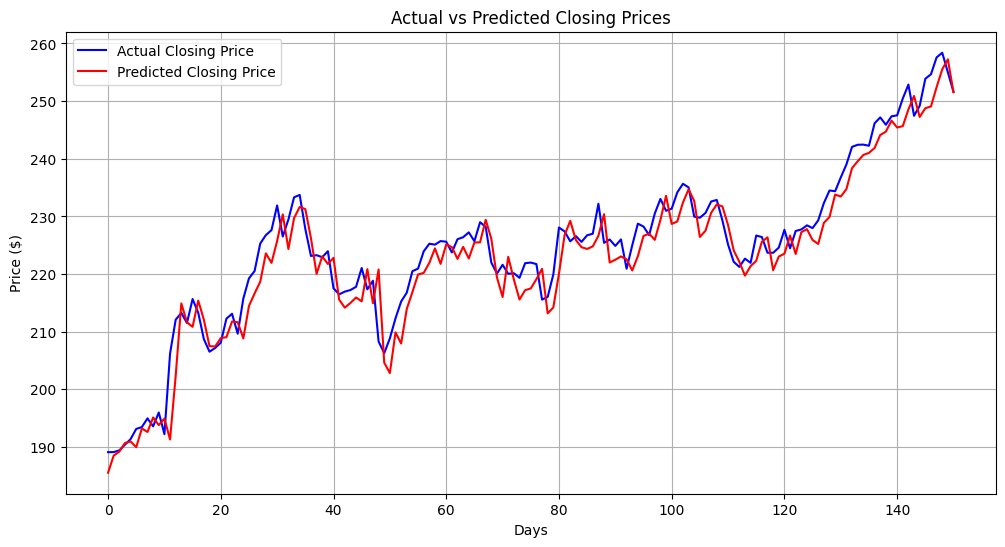

In [6]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Closing Price', color='blue')
plt.plot(predictions, label='Predicted Closing Price', color='red')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()
